<a href="https://colab.research.google.com/github/AnushaKarunakaran/NLP/blob/master/Text_Anaytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Feedback File

Open a file from Google Drive

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Feedback.csv to Feedback (4).csv


In [ ]:
import pandas as pd
import numpy as np
import string   
import scipy
import nltk
import io
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from tabulate import tabulate
pd.set_option('max_rows', 99999)
pd.set_option('display.max_columns', 30)



Copy the contents of the file from Google Drive to Colab

In [ ]:
df_bonus = pd.read_csv(io.BytesIO(uploaded['Feedback.csv']))

In [ ]:
    digits = list(string.digits)   
    df_bonus = df_bonus.assign(Numeric_Answers= np.where(df_bonus['responseshorttext'].isin(digits),                          
                                             df_bonus['responseshorttext'],
                                             np.nan
                                            ),

                   FreeText =       np.where(df_bonus['responseshorttext'].isin(digits),
                                             np.nan,
                                             df_bonus['responseshorttext']
                                           )
                  )
    
    df_bonus

,responseshorttext,Numeric_Answers,FreeText
0,5,5,NaN
1,The support person I spoke with wasn’t listeni...,NaN,The support person I spoke with wasn’t listeni...
2,1,1,NaN
3,Your agent was very clear and precise on fixin...,NaN,Your agent was very clear and precise on fixin...
4,5,5,NaN
...,...,...,...
1210,5,5,NaN
1211,5,5,NaN
1212,5,5,NaN
1213,5,5,NaN


In [ ]:
df_numeric_cleaned = df_bonus['Numeric_Answers'].dropna()
Ratings=pd.DataFrame(df_numeric_cleaned)
df_text_cleaned=df_bonus['FreeText'].dropna()
Text_Reviews=pd.DataFrame(df_text_cleaned)

In [ ]:
Ratings['Numeric_Answers'].value_counts()

5    622
1     60
4     49
3     28
2     25
8      1
9      1
Name: Numeric_Answers, dtype: int64

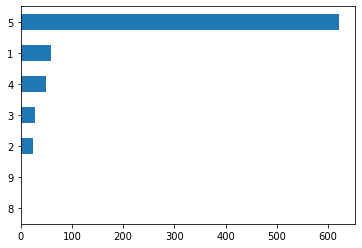

In [ ]:
Ratings['Numeric_Answers'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

Focusing on the text part

In [ ]:
Text_Reviews.reset_index(drop=True, inplace=True)
Text_Reviews['Char Count'] = Text_Reviews['FreeText'].str.len() 
Text_Reviews['Special Char Count'] = [sum(char in string.punctuation for char in review) \
                            for review in Text_Reviews['FreeText']] 
Text_Reviews["Word Count"] = Text_Reviews['FreeText'].apply(lambda x: len(x.split(" ")))
Text_Reviews


,FreeText,Char Count,Special Char Count,Word Count
0,The support person I spoke with wasn’t listeni...,203,2,36
1,Your agent was very clear and precise on fixin...,91,1,17
2,Very helpful and resourceful!,29,1,4
3,Excellent customer support and very quick serv...,50,1,7
4,Tech was awesome,16,0,3
...,...,...,...,...
423,"Excellent customer service, but still having p...",96,2,15
424,Agent was great and super helpful!,34,1,6
425,My questions has yet to be answered. I was giv...,83,2,16
426,Kaitlyn is the best!,20,1,4


In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

text = Text_Reviews['FreeText']
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
Text_Reviews["Review_Clean"] = Text_Reviews['FreeText'].apply(lambda x: clean_text(x))

Text_Reviews

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,FreeText,Char Count,Special Char Count,Word Count,Review_Clean
0,The support person I spoke with wasn’t listeni...,203,2,36,support person speak wasn’t listen tell direct...
1,Your agent was very clear and precise on fixin...,91,1,17,agent clear precise fix problem someone tech s...
2,Very helpful and resourceful!,29,1,4,helpful resourceful
3,Excellent customer support and very quick serv...,50,1,7,excellent customer support quick service
4,Tech was awesome,16,0,3,tech awesome
...,...,...,...,...,...
423,"Excellent customer service, but still having p...",96,2,15,excellent customer service still problem fix call
424,Agent was great and super helpful!,34,1,6,agent great super helpful
425,My questions has yet to be answered. I was giv...,83,2,16,question yet answer give generic answer find o...
426,Kaitlyn is the best!,20,1,4,kaitlyn best


In [ ]:
# add sentiment anaylsis columns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
 
sid = SentimentIntensityAnalyzer()
Text_Reviews['Sentiments'] =Text_Reviews['FreeText'].apply(lambda x: sid.polarity_scores(x))
Text_Reviews = pd.concat([Text_Reviews.drop(['Sentiments'], axis=1), Text_Reviews['Sentiments'].apply(pd.Series)], axis=1)

Text_Reviews


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,FreeText,Char Count,Special Char Count,Word Count,Review_Clean,neg,neu,pos,compound
0,The support person I spoke with wasn’t listeni...,203,2,36,support person speak wasn’t listen tell direct...,0.064,0.856,0.080,0.1321
1,Your agent was very clear and precise on fixin...,91,1,17,agent clear precise fix problem someone tech s...,0.131,0.728,0.140,0.0498
2,Very helpful and resourceful!,29,1,4,helpful resourceful,0.000,0.470,0.530,0.5244
3,Excellent customer support and very quick serv...,50,1,7,excellent customer support quick service,0.000,0.428,0.572,0.7712
4,Tech was awesome,16,0,3,tech awesome,0.000,0.328,0.672,0.6249
...,...,...,...,...,...,...,...,...,...
423,"Excellent customer service, but still having p...",96,2,15,excellent customer service still problem fix call,0.188,0.688,0.124,-0.2960
424,Agent was great and super helpful!,34,1,6,agent great super helpful,0.000,0.213,0.787,0.9020
425,My questions has yet to be answered. I was giv...,83,2,16,question yet answer give generic answer find o...,0.000,1.000,0.000,0.0000
426,Kaitlyn is the best!,20,1,4,kaitlyn best,0.000,0.400,0.600,0.6696


In [ ]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
 
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(Text_Reviews['Review_Clean'].apply(lambda x: x.split(" ")))]
 
# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
 
# transform each document into a vector data
doc2vec_df =Text_Reviews['Review_Clean'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
Text_Reviews = pd.concat([Text_Reviews, doc2vec_df], axis=1)

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(Text_Reviews['Review_Clean']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = Text_Reviews.index
Text_Reviews = pd.concat([Text_Reviews, tfidf_df], axis=1)

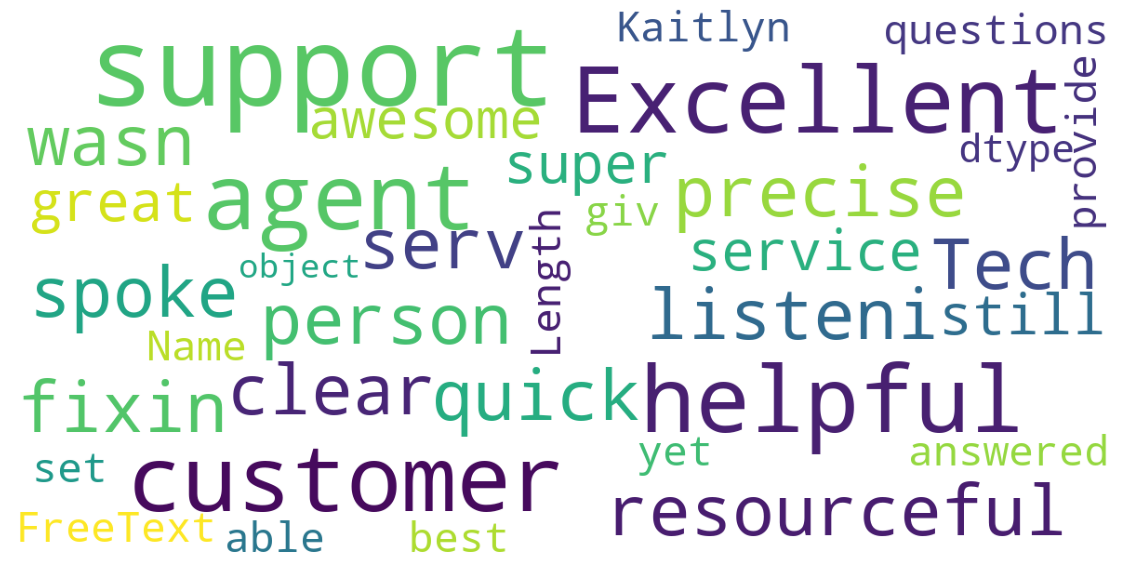

In [ ]:
# wordcloud function
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
 
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
 
    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(Text_Reviews['FreeText'])

In [ ]:
Text_Reviews[Text_Reviews['Word Count'] >= 5].sort_values("pos", ascending = False)[['FreeText', "pos"]].head(10)

,FreeText,pos
340,Katelyn was fantastic! Super helpful.,0.841
62,"Friendliest, best customer support workers.",0.840
424,Agent was great and super helpful!,0.787
375,Travis was super responsive and helpful,0.754
341,"Yes. Kate is the best ever. Super efficient, s...",0.754
178,Great!!! Thanks this video its easy and perfec...,0.743
11,The support agent was awesome!!!,0.719
56,Excellent support given by my technician. Thanks!,0.706
283,Jimmy was great! Thank you,0.697
27,Very helpful and patient. Good customer support!,0.692


In [ ]:
Text_Reviews[Text_Reviews['Word Count'] >= 5].sort_values("neg", ascending = False)[['FreeText', 'neg']].head(10)

,FreeText,neg
167,Rotten help! Not solved link problem! Terrible...,0.533
295,Awful never heard back and no one came for the...,0.403
396,Everything is working just great no problems.,0.377
175,Did not fulfill my need,0.376
242,No one has contacted me,0.355
239,Main issue not really resolved; secondary issu...,0.335
265,Issue was ultimately resolved but took forever...,0.330
210,Problem not addressed. App is not working,0.310
13,He never came to fix the problem,0.310
282,Takes 1 month to resolve issues - completely u...,0.302


Unigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(Text_Reviews['Review_Clean'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'], ascending=False)

,frequency
service,73
helpful,71
work,71
issue,64
great,63
dwelo,62
fix,51
get,48
agent,48
problem,41


Bigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(Text_Reviews['Review_Clean'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'], ascending=False)

,frequency
customer service,29
fix issue,13
fix problem,12
great job,10
support agent,9
extremely helpful,9
issue resolve,9
still work,9
quick response,9
everything work,7


Trigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(Text_Reviews['Review_Clean'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'], ascending=False)



,frequency
excellent customer service,4
great customer service,4
customer service ve,3
keep great work,3
take day get,3
issue still resolve,3
customer service thank,2
agent super helpful,2
customer service prompt,2
get issue resolve,2
